<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PREPARATION DES DONNEES</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et préparation des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies et chargement des fichiers</h3>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Configure pandas pour afficher les nombres décimaux avec 2 chiffres après la virgule.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Import des trois dataframes
df_population = pd.read_csv('Data/Population_2000_2018.csv')
df_dispo_alimentaire = pd.read_csv('Data/DisponibiliteAlimentaire_2017.csv')
df_pib_stabilite_politique = pd.read_csv('Data/pib_stabilite_politique_2017.csv')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Nettoyages des données</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2.1 - Stabilité politique</h3>
</div>

In [4]:
# Aperçu de l'import
display(df_pib_stabilite_politique.head())

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Données de la sécurité alimentaire,Afghanistan,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,I$,2058.40
1,Données de la sécurité alimentaire,Afghanistan,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-2.80
2,Données de la sécurité alimentaire,Afrique du Sud,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,I$,13860.30
3,Données de la sécurité alimentaire,Afrique du Sud,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-0.28
4,Données de la sécurité alimentaire,Albanie,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,I$,12771.00


In [5]:
# Vérification de valeurs nulles
df_pib_stabilite_politique.isna().sum()

Domaine    0
Zone       0
Élément    0
Produit    0
Année      0
Unité      0
Valeur     0
dtype: int64

In [6]:
# Modification pour ne garder que les colonnes utiles pour la suite
df_pib_stabilite_politique = df_pib_stabilite_politique[['Zone', 'Produit', 'Valeur']]
df_pib_stabilite_politique.head()

,Zone,Produit,Valeur
0,Afghanistan,"PIB par habitant, ($ PPA internationaux consta...",2058.40
1,Afghanistan,Stabilité politique et absence de violence/ter...,-2.80
2,Afrique du Sud,"PIB par habitant, ($ PPA internationaux consta...",13860.30
3,Afrique du Sud,Stabilité politique et absence de violence/ter...,-0.28
4,Albanie,"PIB par habitant, ($ PPA internationaux consta...",12771.00


In [7]:
df_pib_stabilite_politique_pivot = pd.pivot(
    df_pib_stabilite_politique, 
    index=['Zone'], 
    columns=['Produit'], 
    values=['Valeur'])
df_pib_stabilite_politique_pivot.head()

Valeur  \
Produit        PIB par habitant, ($ PPA internationaux constants de 2017)   
Zone                                                                        
Afghanistan                                               2058.40           
Afrique du Sud                                           13860.30           
Albanie                                                  12771.00           
Algérie                                                  11737.40           
Allemagne                                                53071.50           

                                                                               
Produit        Stabilité politique et absence de violence/terrorisme (indice)  
Zone                                                                           
Afghanistan                                                 -2.80              
Afrique du Sud                                              -0.28              
Albanie                                                      0.38              
Algérie                                                     -0.92              
Allemagne                                                    0.59

In [8]:
# simplification de l'indexation des colonnes
df_pib_stabilite_politique_pivot.columns = df_pib_stabilite_politique_pivot.columns.droplevel()

# Renommage des colonnes pour plus de lisibilité
df_pib_stabilite_politique_pivot = df_pib_stabilite_politique_pivot.rename(
    columns={'PIB par habitant, ($ PPA internationaux constants de 2017)': 'PIB par habitant', 
             'Stabilité politique et absence de violence/terrorisme (indice)': 'Stabilité politique'})

df_pib_stabilite_politique_pivot.head()

Produit,PIB par habitant,Stabilité politique
Zone,,
Afghanistan,2058.40,-2.80
Afrique du Sud,13860.30,-0.28
Albanie,12771.00,0.38
Algérie,11737.40,-0.92
Allemagne,53071.50,0.59


In [9]:
# Vérification des valeurs nulles, elles seront traitées par la suite
df_pib_stabilite_politique_pivot[df_pib_stabilite_politique_pivot.isna().any(axis=1)]

Produit,PIB par habitant,Stabilité politique
Zone,,
Andorre,NaN,1.42
Chine,14520.80,NaN
"Chine, Taiwan Province de",NaN,0.86
Cuba,NaN,0.65
Groenland,NaN,1.92
République arabe syrienne,NaN,-2.62
République populaire démocratique de Corée,NaN,-0.50
Samoa américaines,NaN,1.22
Soudan du Sud,NaN,-2.45


In [10]:
df_pib_stabilite_politique_pivot.describe()

Produit,PIB par habitant,Stabilité politique
count,187.00,197.00
mean,20925.34,-0.06
std,22086.26,0.99
min,773.60,-2.94
25%,4862.70,-0.65
50%,13102.10,0.04
75%,29087.35,0.77
max,126144.00,1.92


In [11]:
# Vérification du pays avec le plus gros PIB par habitant
display(df_pib_stabilite_politique_pivot.sort_values(by='PIB par habitant', ascending=False))

Produit,PIB par habitant,Stabilité politique
Zone,,
Chine - RAS de Macao,126144.00,1.43
Luxembourg,114986.00,1.33
Singapour,95310.30,1.62
Qatar,91738.80,0.66
Bermudes,81835.00,1.00
...,...,...
Samoa américaines,NaN,1.22
Soudan du Sud,NaN,-2.45
Venezuela (République bolivarienne du),NaN,-1.27


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2.2
 - Population</h3>
</div>

In [12]:
display(df_population.head())

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.95,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.99,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.77,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.87,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.68,X,Sources internationales sûres,NaN


In [13]:
# Vérification de valeurs nulles
df_population.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [14]:
# Nettoyage pour garder que l'année 2017 (pour être en accord avec les autres df)
df_population = df_population.loc[df_population['Année'] == 2017, :]

In [15]:
# Modification pour ne garder que les colonnes utiles pour la suite
df_population = df_population[['Zone', 'Valeur']]

In [16]:
# Renommage de la colonne "valeur" pour "population"
df_population = df_population.rename(columns={'Valeur' : 'Population'})

In [17]:
# Mis à l'échelle de la population
df_population['Population'] = df_population['Population'] * 1000

# Changement du dtype float en int
df_population['Population'] = df_population['Population'].astype('int64')

In [18]:
df_population.describe()

,Population
count,236.00
mean,31983619.10
std,131894884.74
min,793.00
25%,380303.25
50%,5203510.50
75%,19308417.75
max,1421021791.00


In [19]:
# Vérification des valeurs maximum pour la population pour éviter les outliers
display(df_population.sort_values(by='Population', ascending=False))
df_population 

,Zone,Population
823,"Chine, continentale",1421021791
1952,Inde,1338676785
1230,États-Unis d'Amérique,325084756
1971,Indonésie,264650963
3029,Pakistan,207906209
...,...,...
2725,Montserrat,4984
1781,Îles Falkland (Malvinas),3068
2896,Nioué,1609
4143,Tokélaou,1300


,Zone,Population
17,Afghanistan,36296113
36,Afrique du Sud,57009756
55,Albanie,2884169
74,Algérie,41389189
93,Allemagne,82658409
...,...,...
4333,Venezuela (République bolivarienne du),29402484
4352,Viet Nam,94600648
4371,Yémen,27834819
4390,Zambie,16853599


In [20]:
df_chine = df_population[df_population['Zone'].str.contains('Chine', case=False, na=False)]
print(df_chine)
df_inde = df_population[df_population['Zone'].str.contains('Inde', case=False, na=False)]
print(df_inde)

                          Zone  Population
785   Chine - RAS de Hong-Kong     7306322
804       Chine - RAS de Macao      622585
823        Chine, continentale  1421021791
842  Chine, Taiwan Province de    23674546
      Zone  Population
1952  Inde  1338676785


Le cas de la Chine est a surveiller car les informations sont trop nombreuses et semble être décousues. Taiwan ne fait pas partie de la Chine... <br>
Pour l'Inde après recherche sur internet, la population est correct. 

In [21]:
# Vérification des valeurs minimum pour la population car cela ne sera vraiment des pays à cibler pour l'étude de marché
display(df_population.sort_values(by='Population', ascending=True).head(50))

,Zone,Population
3672,Saint-Siège,793
4143,Tokélaou,1300
2896,Nioué,1609
1781,Îles Falkland (Malvinas),3068
2725,Montserrat,4984
3653,Saint-Pierre-et-Miquelon,5887
3569,"Sainte-Hélène, Ascension et Tristan da Cunha",6008
3550,Saint-Barthélemy,9784
2801,Nauru,10573
4257,Tuvalu,11370


In [22]:
df_sorted = df_population.sort_values(by='Population', ascending=True)
# Afficher les lignes 50 à 100
df_subset = df_sorted.iloc[50:100]
print(df_subset)

                             Zone  Population
188   Antilles néerlandaises (ex)      275186
1629             Guyane française      275191
3219          Polynésie française      276102
2934           Nouvelle-Calédonie      277150
4314                      Vanuatu      285510
397                       Barbade      286232
2047                      Islande      334393
454                        Belize      375769
2560                   Martinique      375948
340                       Bahamas      381755
1496                   Guadeloupe      399672
614             Brunéi Darussalam      424473
2522                        Malte      437933
2484                     Maldives      496402
690                    Cabo Verde      537498
3542            Sahara occidental      552615
4010                     Suriname      570496
2389                   Luxembourg      591910
804          Chine - RAS de Macao      622585
2706                   Monténégro      627563
1857                 Îles Salomon 

Les 50 premiers pays sont des tous petits pays, une bonne partie sont des îles (n'aidant pas la livraison de nos poulets), je choisi donc de ne pas garder les pays ayant moins de 30 0000 habitants

In [23]:
df_population = df_population.loc[df_population['Population'] > 300000, :]

In [24]:
# Vérification
df_population.describe()

,Population
count,180.00
mean,41905892.87
std,149737914.67
min,334393.00
25%,3304560.50
50%,9815581.50
75%,29506054.50
max,1421021791.00


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2.3 - Disponibilité alimentaire</h3>
</div>

In [25]:
display(df_dispo_alimentaire.head())

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées


In [26]:
# Vérification de valeurs nulles
df_dispo_alimentaire.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [27]:
# Modification pour ne garder que les colonnes utiles pour la suite
df_dispo_alimentaire = df_dispo_alimentaire[['Zone', 'Élément', 'Produit', 'Valeur']]

In [28]:
# Aperçu des modifications
display(df_dispo_alimentaire.head(10))

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2302.00
2,Afghanistan,Variation de stock,Blé et produits,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.00
5,Afghanistan,Aliments pour animaux,Blé et produits,76.00
6,Afghanistan,Semences,Blé et produits,344.00
7,Afghanistan,Pertes,Blé et produits,642.00
8,Afghanistan,Résidus,Blé et produits,0.00
9,Afghanistan,Nourriture,Blé et produits,5640.00


In [29]:
# Voir les différents produits
df_dispo_alimentaire['Produit'].unique()
#On ne garde que nos "Viande de Volailles" 
df_dispo_alimentaire = df_dispo_alimentaire.loc[df_dispo_alimentaire['Produit'] == 'Viande de Volailles', :]

In [30]:
# Voir les différents élément
df_dispo_alimentaire['Élément'].unique()
# Liste avec les éléments qui nous intéresse
liste_elements = (
    'Production', 'Importations - Quantité', 'Variation de stock',
    'Exportations - Quantité', 'Disponibilité intérieure', 'Nourriture',
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Disponibilité alimentaire (Kcal/personne/jour)',
    'Disponibilité de protéines en quantité (g/personne/jour)',)
# Conservation des éléments cités dans la liste pour le df
df_dispo_alimentaire = df_dispo_alimentaire.loc[df_dispo_alimentaire['Élément'].isin(liste_elements), :]

In [31]:
# Aperçu des modifications
display(df_dispo_alimentaire.head(20))

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.00
657,Afghanistan,Nourriture,Viande de Volailles,55.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,1.53
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,5.00
660,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,0.54
1704,Afrique du Sud,Production,Viande de Volailles,1667.00
1705,Afrique du Sud,Importations - Quantité,Viande de Volailles,514.00


In [32]:
#De nouveau un pivot pour alimenter le df
df_dispo_alimentaire_pivot = pd.pivot(df_dispo_alimentaire,
                                     index=['Zone'],
                                     columns=['Élément'],
                                     values=['Valeur'])

display(df_dispo_alimentaire_pivot.head())

Valeur  \
Élément        Disponibilité alimentaire (Kcal/personne/jour)   
Zone                                                            
Afghanistan                                              5.00   
Afrique du Sud                                         143.00   
Albanie                                                 85.00   
Algérie                                                 22.00   
Allemagne                                               71.00   

                                                                       \
Élément        Disponibilité alimentaire en quantité (kg/personne/an)   
Zone                                                                    
Afghanistan                                                  1.53       
Afrique du Sud                                              35.69       
Albanie                                                     16.36       
Algérie                                                      6.38       
Allemagne                                                   19.47       

                                                                         \
Élément        Disponibilité de protéines en quantité (g/personne/jour)   
Zone                                                                      
Afghanistan                                                  0.54         
Afrique du Sud                                              14.11         
Albanie                                                      6.26         
Algérie                                                      1.97         
Allemagne                                                    7.96         

                                                                 \
Élément        Disponibilité intérieure Exportations - Quantité   
Zone                                                              
Afghanistan                       57.00                     NaN   
Afrique du Sud                  2118.00                   63.00   
Albanie                           47.00                    0.00   
Algérie                          277.00                    0.00   
Allemagne                       1739.00                  646.00   

                                                              \
Élément        Importations - Quantité Nourriture Production   
Zone                                                           
Afghanistan                      29.00      55.00      28.00   
Afrique du Sud                  514.00    2035.00    1667.00   
Albanie                          38.00      47.00      13.00   
Algérie                           2.00     264.00     275.00   
Allemagne                       842.00    1609.00    1514.00   

                                   
Élément        Variation de stock  
Zone                               
Afghanistan                  0.00  
Afrique du Sud              -0.00  
Albanie                      4.00  
Algérie                      0.00  
Allemagne                  -29.00

In [33]:
df_dispo_alimentaire_pivot.columns = df_dispo_alimentaire_pivot.columns.droplevel()

In [34]:
df_dispo_alimentaire_pivot.isna().sum()

Élément
Disponibilité alimentaire (Kcal/personne/jour)               0
Disponibilité alimentaire en quantité (kg/personne/an)       0
Disponibilité de protéines en quantité (g/personne/jour)     0
Disponibilité intérieure                                     2
Exportations - Quantité                                     37
Importations - Quantité                                      2
Nourriture                                                   2
Production                                                   4
Variation de stock                                           3
dtype: int64

In [35]:
df_with_nan = df_dispo_alimentaire_pivot[df_dispo_alimentaire_pivot.isna().any(axis=1)]
# Afficher le DataFrame filtré
print(df_with_nan)

Élément                                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                                    
Afghanistan                                                                      5.00   
Bahamas                                                                        182.00   
Bangladesh                                                                       7.00   
Burkina Faso                                                                     8.00   
Cabo Verde                                                                      62.00   
Cambodge                                                                        11.00   
Cuba                                                                            82.00   
Djibouti                                                                         9.00   
Gambie                                                                          12.00   
Grenade              

Il y a 37 valeurs nulles compatibilisées pour la colonne "Exportations - Quantité". <br>
Selon FAO nous pouvons calculer comme suit la disponibilité pour l'exportation comme suit : <br>
Production + importations + variations des stocks (baisse ou augmentation) = quantités disponibles pour l'exportation et l'utilisation intérieure (qu'il faudra donc soustraire)
<br> <br>
Sur les 38 pays avec des valeurs NaN, Djibouti, Maldives, Ouzbékistan, Pérou et République démocratique populaire lao n'ont pas les données nécessaires pour effectuer le caclul. Il faudra s'assurer de leur non présence dans le DF final. 

In [36]:
# Tentative de formule à l'aide de ce calcul : 
# Quantités disponibles pour l'exportation et l'utilisation intérieure = (Production + Importations - Disponibilité alimentaire en quantité + Variation de Stock) 
# Calcul 2 : Résultat du calcul 1 - Disponibilité intérieure

df_dispo_alimentaire_pivot['Exportations - Quantité'] = df_dispo_alimentaire_pivot.apply(
    lambda x : ((x['Production'] + x['Importations - Quantité'] - 
                 x['Disponibilité alimentaire en quantité (kg/personne/an)'] + 
                 x['Variation de stock']) 
                - x['Disponibilité intérieure'])
    if pd.isnull(x['Exportations - Quantité']) else x['Exportations - Quantité'], axis=1)

In [37]:
display(df_dispo_alimentaire_pivot.head())
df_dispo_alimentaire_pivot.isna().sum()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
Zone,,,,,,,,,
Afghanistan,5.00,1.53,0.54,57.00,-1.53,29.00,55.00,28.00,0.00
Afrique du Sud,143.00,35.69,14.11,2118.00,63.00,514.00,2035.00,1667.00,-0.00
Albanie,85.00,16.36,6.26,47.00,0.00,38.00,47.00,13.00,4.00
Algérie,22.00,6.38,1.97,277.00,0.00,2.00,264.00,275.00,0.00
Allemagne,71.00,19.47,7.96,1739.00,646.00,842.00,1609.00,1514.00,-29.00


Élément
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    2
Exportations - Quantité                                     4
Importations - Quantité                                     2
Nourriture                                                  2
Production                                                  4
Variation de stock                                          3
dtype: int64

L'exportation passe de 37 à 4  

In [38]:
# Vérification des valeurs nulles, elles seront traitées par la suite
df_dispo_alimentaire_pivot[df_dispo_alimentaire_pivot.isna().any(axis=1)]

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
Zone,,,,,,,,,
Djibouti,9.00,2.68,0.92,3.00,NaN,3.00,3.00,NaN,0.00
Maldives,47.00,13.50,4.70,12.00,NaN,12.00,7.00,NaN,0.00
Ouzbékistan,6.00,1.96,0.63,NaN,NaN,NaN,NaN,NaN,NaN
Pérou,62.00,13.47,6.71,1523.00,1.00,60.00,424.00,1465.00,NaN
République démocratique populaire lao,41.00,10.91,3.59,NaN,NaN,NaN,NaN,NaN,NaN


On retrouve bien nos 5 pays cité ci-dessus.

In [39]:
df_dispo_alimentaire_pivot.describe()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
count,172.00,172.00,172.00,170.00,168.00,170.00,170.00,168.00,169.00
mean,74.56,20.21,7.12,687.59,104.55,89.53,657.05,725.19,13.67
std,60.57,15.86,5.60,2187.18,463.74,186.67,2136.55,2501.46,75.36
min,0.00,0.13,0.04,2.00,-70.31,0.00,2.00,0.00,-119.00
25%,22.00,6.44,2.17,30.50,0.00,3.00,28.50,13.75,0.00
50%,64.00,18.09,6.50,100.00,1.00,16.00,99.50,70.00,0.00
75%,105.50,30.04,10.37,368.25,16.60,81.25,365.25,409.75,7.00
max,243.00,72.31,27.87,18266.00,4223.00,1069.00,18100.00,21914.00,859.00


In [40]:
# Vérification du pays avec une très grande quantité d'exportations
display(df_dispo_alimentaire_pivot.sort_values(by='Exportations - Quantité', ascending=False))

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
Zone,,,,,,,,,
Brésil,204.00,48.03,15.68,9982.00,4223.00,3.00,9982.00,14201.00,0.00
États-Unis d'Amérique,219.00,55.68,19.93,18266.00,3692.00,123.00,18100.00,21914.00,80.00
Pays-Bas,70.00,20.33,8.48,372.00,1418.00,608.00,346.00,1100.00,-82.00
Pologne,107.00,30.30,12.14,1156.00,1025.00,55.00,1150.00,2351.00,225.00
Thaïlande,47.00,12.95,4.35,881.00,796.00,2.00,896.00,1676.00,1.00
...,...,...,...,...,...,...,...,...,...
Saint-Vincent-et-les Grenadines,243.00,72.31,25.10,8.00,-70.31,9.00,8.00,0.00,1.00
Djibouti,9.00,2.68,0.92,3.00,NaN,3.00,3.00,NaN,0.00
Maldives,47.00,13.50,4.70,12.00,NaN,12.00,7.00,NaN,0.00


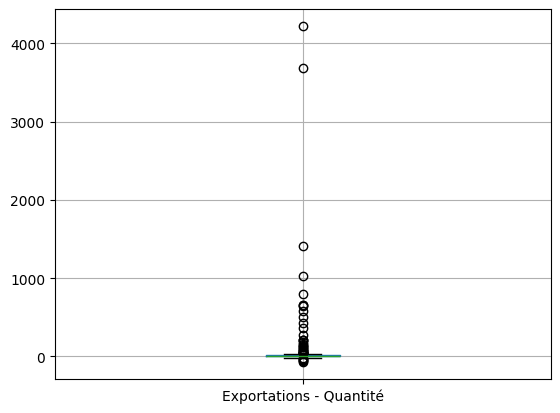

In [41]:
# Vérification graphique pour confirmer nos potentiels outliers
df_dispo_alimentaire_pivot.boxplot(column='Exportations - Quantité')
plt.show()

Brésil et USA loin devant en terme d'exportation

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Jointures des fichiers</h2></div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Jointure entre disponibilité alimentaire et PIB/Politique</h3>
</div>

In [42]:
# Première jointure entre les df "DispoAlimentaire_2017" et " pid_stabilite_politique"
# outer join pour garder l'ensemble des données
df_dispo_alimentaire_stabilite_politique = pd.merge(df_dispo_alimentaire_pivot, df_pib_stabilite_politique_pivot, on='Zone', how='outer') 
display(df_dispo_alimentaire_stabilite_politique.head())

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,PIB par habitant,Stabilité politique
Zone,,,,,,,,,,,
Afghanistan,5.00,1.53,0.54,57.00,-1.53,29.00,55.00,28.00,0.00,2058.40,-2.80
Afrique du Sud,143.00,35.69,14.11,2118.00,63.00,514.00,2035.00,1667.00,-0.00,13860.30,-0.28
Albanie,85.00,16.36,6.26,47.00,0.00,38.00,47.00,13.00,4.00,12771.00,0.38
Algérie,22.00,6.38,1.97,277.00,0.00,2.00,264.00,275.00,0.00,11737.40,-0.92
Allemagne,71.00,19.47,7.96,1739.00,646.00,842.00,1609.00,1514.00,-29.00,53071.50,0.59


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Jointure de disponibilité alimentaire (politique et PIB) avec les données de populations</h3>
</div>

In [43]:
# Deuxième jointure entre la population et la jointure ci-dessus
# Toujours en outer
df = pd.merge(df_dispo_alimentaire_stabilite_politique, df_population, on='Zone', how='outer')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      205 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 4   Disponibilité intérieure                                  170 non-null    float64
 5   Exportations - Quantité                                   168 non-null    float64
 6   Importations - Quantité                                   170 non-null    float64
 7   Nourriture                                                170 non-null    float64
 8   Production          

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,PIB par habitant,Stabilité politique,Population
0,Afghanistan,5.00,1.53,0.54,57.00,-1.53,29.00,55.00,28.00,0.00,2058.40,-2.80,36296113.00
1,Afrique du Sud,143.00,35.69,14.11,2118.00,63.00,514.00,2035.00,1667.00,-0.00,13860.30,-0.28,57009756.00
2,Albanie,85.00,16.36,6.26,47.00,0.00,38.00,47.00,13.00,4.00,12771.00,0.38,2884169.00
3,Algérie,22.00,6.38,1.97,277.00,0.00,2.00,264.00,275.00,0.00,11737.40,-0.92,41389189.00
4,Allemagne,71.00,19.47,7.96,1739.00,646.00,842.00,1609.00,1514.00,-29.00,53071.50,0.59,82658409.00


In [44]:
# Suppression des colonnes non intéressantes.
df = df.drop(columns=['Disponibilité alimentaire (Kcal/personne/jour)', 'Nourriture', 'Production', 'Variation de stock'  ])
display(df.head())
df.info()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population
0,Afghanistan,1.53,0.54,57.00,-1.53,29.00,2058.40,-2.80,36296113.00
1,Afrique du Sud,35.69,14.11,2118.00,63.00,514.00,13860.30,-0.28,57009756.00
2,Albanie,16.36,6.26,47.00,0.00,38.00,12771.00,0.38,2884169.00
3,Algérie,6.38,1.97,277.00,0.00,2.00,11737.40,-0.92,41389189.00
4,Allemagne,19.47,7.96,1739.00,646.00,842.00,53071.50,0.59,82658409.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      205 non-null    object 
 1   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 3   Disponibilité intérieure                                  170 non-null    float64
 4   Exportations - Quantité                                   168 non-null    float64
 5   Importations - Quantité                                   170 non-null    float64
 6   PIB par habitant                                          187 non-null    float64
 7   Stabilité politique                                       197 non-null    float64
 8   Population           

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Gestion des nuls et export du dataFram en CSV</h2>
</div>

In [45]:
# Regroumement des pays avec des valeurs nulles dans un autre DF pour les retraiter par la suite
countries_with_nans = df[df.isnull().any(axis=1)]

# Aperçu
display(countries_with_nans.head())
countries_with_nans.shape

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population
5,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,1.42,NaN
7,Antigua-et-Barbuda,54.10,17.77,7.00,0.00,7.00,19840.30,0.75,NaN
15,Bahreïn,NaN,NaN,NaN,NaN,NaN,47709.80,-0.96,1494076.00
17,Barbade,46.78,15.33,17.00,0.00,2.00,15800.40,0.97,NaN
20,Bermudes,NaN,NaN,NaN,NaN,NaN,81835.00,1.00,NaN


(56, 9)

In [46]:
# Un point sur la Chine des NaN
df_chine_2 = countries_with_nans[countries_with_nans['Zone'].str.contains('Chine', case=False, na=False)]
print(df_chine_2)

                         Zone  \
37                      Chine   
40  Chine, Taiwan Province de   
41        Chine, continentale   

    Disponibilité alimentaire en quantité (kg/personne/an)  \
37                                                NaN        
40                                              33.17        
41                                              12.33        

    Disponibilité de protéines en quantité (g/personne/jour)  \
37                                                NaN          
40                                              11.01          
41                                               3.96          

    Disponibilité intérieure  Exportations - Quantité  \
37                       NaN                      NaN   
40                    785.00                     8.00   
41                  18161.00                   576.00   

    Importations - Quantité  PIB par habitant  Stabilité politique  \
37                      NaN          14520.80                 

In [47]:
# Export d'un excel pour voir les lignes avec des NaN
countries_with_nans.to_excel('Data/countries_with_nans.xlsx')

In [48]:
# Suppression des valeurs NaN dans le df final
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 204
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      149 non-null    object 
 1   Disponibilité alimentaire en quantité (kg/personne/an)    149 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  149 non-null    float64
 3   Disponibilité intérieure                                  149 non-null    float64
 4   Exportations - Quantité                                   149 non-null    float64
 5   Importations - Quantité                                   149 non-null    float64
 6   PIB par habitant                                          149 non-null    float64
 7   Stabilité politique                                       149 non-null    float64
 8   Population                

56 pays sont donc retirés pour manque d'information. <br>
Au vu de la situation géopolitique de notre planète en avril 2025. Je décide de supprimer du DF l'Ukraine et la Russie vu que les deux pays sont en guerres. <br>
Je fais également le choix de supprimer les Etats-Unies d'Amérique au vu de l'augmentation des taxes envers l'Europe actée par leur président D.Trump (hausse des taxes d'import/export de 20%). Ce dernier étant lui aussi impliqué dans la guerre des deux pays précédemments cités. <br>
Dernier élément qui semble poser problème :  le Brésil . Il a un chiffre vraiment important en exportation. Cet outlier qu'il est une valeur erronnée ou atypique ne change pas le fait qu'elle ne nous intéresse finalement pas. En effet après recherche sur internet le Brésil est le plus gros importateur de poulet, il n'y a donc aucun intérêt à essayer de s'y faire une place. 

In [49]:
# Suppression des pays cité ci-dessus

# recherchePays = df[df['Zone'].str.contains('Russie', case=False, na=False)]
# print(recherchePays)

# Liste des pays à supprimer
pays_a_supprimer = ['États-Unis d\'Amérique', 'Ukraine', 'Fédération de Russie', 'Brésil']

# Suppression des pays
df = df[~df['Zone'].isin(pays_a_supprimer)]
# Affichage du DataFrame résultant
df.columns

Index(['Zone', 'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'PIB par habitant', 'Stabilité politique',
       'Population'],
      dtype='object')

In [50]:
# Enregistrement du df final dans le dossier "Data"
df.to_csv('Data/df_final.csv', index=False)
print(df.shape)

(145, 9)
